In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [13]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
# Load the Iris dataset
iris = load_iris()



In [15]:
# The data is stored in the 'data' attribute
X = iris.data

# The target labels are stored in the 'target' attribute
y = iris.target


In [16]:
# The feature names are stored in the 'feature_names' attribute
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:

# The target names are stored in the 'target_names' attribute
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
print("Number of Samples:", X.shape[0])


Number of Samples: 150


In [11]:
print("Number of Features:", X.shape[1])


Number of Features: 4


In [12]:
print("Number of Classes:", len(target_names))

Number of Classes: 3


In [19]:
# If you want to convert the dataset into a pandas DataFrame for easier manipulation:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['class'] = iris_df['target'].map(lambda ind: target_names[ind])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


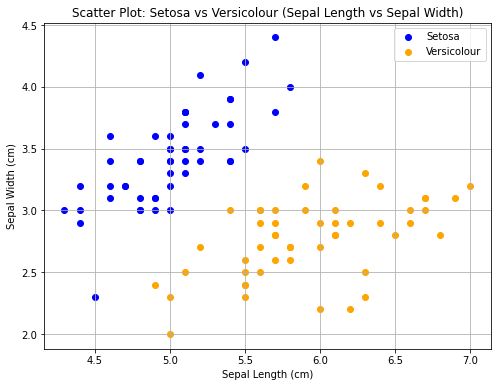

In [25]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map(lambda ind: iris.target_names[ind])

# Filter the DataFrame to include only 'Setosa' and 'Versicolour' classes
setosa_versicolour_df = iris_df[iris_df['species'].isin(['setosa', 'versicolor'])]

# Extract Sepal Length and Sepal Width for 'Setosa' and 'Versicolour'
setosa_sepal_length = setosa_versicolour_df[setosa_versicolour_df['species'] == 'setosa']['sepal length (cm)']
setosa_sepal_width = setosa_versicolour_df[setosa_versicolour_df['species'] == 'setosa']['sepal width (cm)']
versicolour_sepal_length = setosa_versicolour_df[setosa_versicolour_df['species'] == 'versicolor']['sepal length (cm)']
versicolour_sepal_width = setosa_versicolour_df[setosa_versicolour_df['species'] == 'versicolor']['sepal width (cm)']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(setosa_sepal_length, setosa_sepal_width, c='blue', label='Setosa')
plt.scatter(versicolour_sepal_length, versicolour_sepal_width, c='orange', label='Versicolour')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot: Setosa vs Versicolour (Sepal Length vs Sepal Width)')
plt.legend()
plt.grid(True)
plt.show()

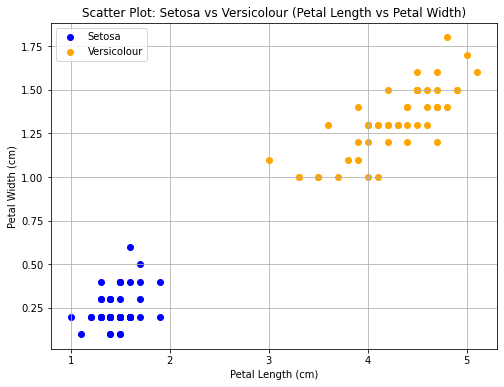

In [27]:



# Extract Petal Length and Petal Width for 'Setosa' and 'Versicolour'
setosa_petal_length = setosa_versicolour_df[setosa_versicolour_df['species'] == 'setosa']['petal length (cm)']
setosa_petal_width = setosa_versicolour_df[setosa_versicolour_df['species'] == 'setosa']['petal width (cm)']
versicolour_petal_length = setosa_versicolour_df[setosa_versicolour_df['species'] == 'versicolor']['petal length (cm)']
versicolour_petal_width = setosa_versicolour_df[setosa_versicolour_df['species'] == 'versicolor']['petal width (cm)']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(setosa_petal_length, setosa_petal_width, c='blue', label='Setosa')
plt.scatter(versicolour_petal_length, versicolour_petal_width, c='orange', label='Versicolour')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot: Setosa vs Versicolour (Petal Length vs Petal Width)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Filter the data to include only 'Setosa' and 'Versicolour' classes
setosa_versicolour_mask = (y == 0) | (y == 1)
X_binary = X[setosa_versicolour_mask]
y_binary = y[setosa_versicolour_mask]


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Create the Support Vector Machine classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:

# Predict on the test set
y_pred = svc_classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [37]:



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


In [35]:
# Generate a classification report to get more detailed metrics
class_names = iris.target_names[:2]  # 'Setosa' and 'Versicolour'
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

